In [2]:
import numpy as np
import matplotlib.pyplot as plt
import SciFiReaders as sr
from skimage.feature import blob_log


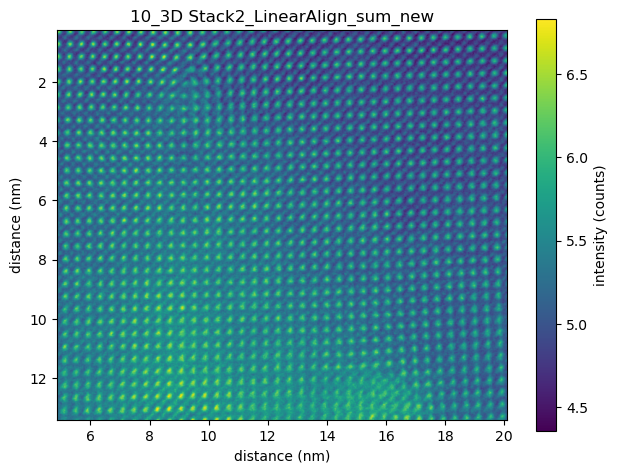

In [3]:
#read the data
dm3_file = r'bto_atomic.dm3'

dm3_reader = sr.DM3Reader(dm3_file)

data = dm3_reader.read()[0]


#Let's crop the image
data_cropped = data[200:-200,10:550]

fig = data_cropped.plot();

In [31]:
#Let's do some blob detection

blobs_log = blob_log(np.array(data_cropped), max_sigma=15, num_sigma=10, threshold=0.25)

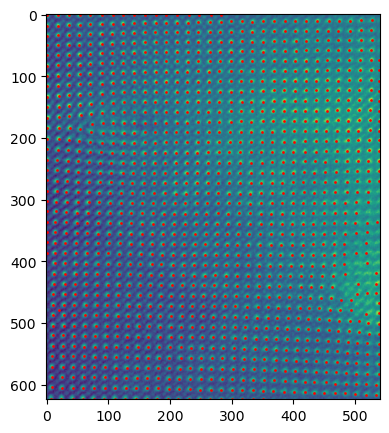

In [32]:
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
axes.imshow(np.array(data_cropped))

for blob in blobs_log:
    y, x, r = blob
    axes.plot(x,y,'ro', markersize=1)

In [33]:
#Exercise: can you fit Gaussians to each of these points, 
#to extract a sub-pixel value accuracy to each of the atomic positions?
#HINT: use this function

def gauss_oval_2D(fitting_space, amplitude, xo, yo, sigmax, sigmay, offset):
    x = fitting_space[0]
    y = fitting_space[1]
    xo = float(xo)
    yo = float(yo)
    g = amplitude * np.exp(-((x - xo) ** 2 / (2 * sigmax ** 2) + ((y - yo) ** 2 / (2 * sigmay ** 2))));

    return g.ravel() + offset
    